# Arabc Characters MNIST 
A [Kaggle Project](https://www.kaggle.com/mloey1/ahcd1) provided by [Benha University](http://bu.edu.eg/staff/mloey)

Project By: [Uzair](https://github.com/Uzair05)

## Using CSV Datasets

### Download and move data

In [1]:
#!pip install --upgrade kaggle
!kaggle datasets download -d mloey1/ahcd1

ahcd1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import os 
import zipfile

try:
    os.mkdir("./data/")
except Exception as err:
    print(f"Error in creating data/:\t{err}")


localzip = "./ahcd1.zip"
zip_ref = zipfile.ZipFile(localzip, 'r')
try:
    zip_ref.extractall('data/')
except Exception as err:
    print(f"Erorr in zip extraction:\t{err}")
finally:
    zip_ref.close()

### Handle Data
Create test, train and validation data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
#import random as rand

In [5]:
data = pd.read_csv("./data/csvTrainImages 13440x1024.csv")
label = pd.read_csv("./data/csvTrainLabel 13440x1.csv")

test_data = pd.read_csv('./data/csvTestImages 3360x1024.csv')
test_label = pd.read_csv('./data/csvTestLabel 3360x1.csv')

In [6]:
x_train = data.to_numpy()
x_shape, _ = x_train.shape
x_train = x_train.reshape(x_shape, 32, 32)
y_train = label.to_numpy()
y_shape, _ = y_train.shape
y_train = y_train.reshape(y_shape,)


x_test = test_data.to_numpy()
x_test_shape, _ = x_test.shape
x_test = x_test.reshape(x_test_shape, 32, 32)
y_test = test_label.to_numpy()
y_test_shape = y_test.shape
y_test = y_test.reshape(y_test_shape,)

In [7]:
for i in range(x_shape):
    x_train[i,:,:] = np.rot90(x_train[i,:,:], axes=(1,0))
for i in range(x_test_shape):
    x_test[i,:,:] = np.rot90(x_test[i,:,:], axes=(1,0))


x_train = x_train.reshape(x_shape, 32, 32, 1)
x_test = x_test.reshape(x_test_shape, 32, 32, 1)
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
y_train = y_train - 1
y_test = y_test - 1

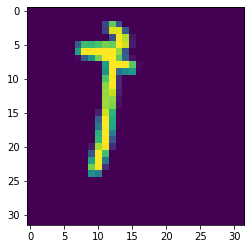

In [9]:
plt.imshow(x_train[6,:,:])

### Create Model

In [22]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        accuracy = 0.95 # Percentage Accuracy.
        if(logs.get('accuracy') != None) and (logs.get('accuracy') >= accuracy): # Experiment with changing this value
          print(f"\nReached {accuracy*100}% accuracy so cancelling training!")
          self.model.stop_training = True

callbacks = myCallback()

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(12, (3,3), activation=tf.nn.relu, padding='same', input_shape=(32,32, 1)),
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.leaky_relu),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(28, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 12)        120       
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        3488      
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                3211328   
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)               

### Train Model

In [24]:
history = model.fit(
    x_train, 
    y_train, 
    epochs=15, 
    verbose=1, 
    callbacks=[callbacks],
)

Epoch 1/15
420/420 [==============================] - 32s 75ms/step - loss: 2.3418 - accuracy: 0.2780
Epoch 2/15
420/420 [==============================] - 32s 77ms/step - loss: 1.3429 - accuracy: 0.5352
Epoch 3/15
420/420 [==============================] - 32s 75ms/step - loss: 0.9397 - accuracy: 0.6705
Epoch 4/15
420/420 [==============================] - 32s 75ms/step - loss: 0.7373 - accuracy: 0.7434
Epoch 5/15
420/420 [==============================] - 32s 75ms/step - loss: 0.5993 - accuracy: 0.7902
Epoch 6/15
420/420 [==============================] - 32s 75ms/step - loss: 0.5108 - accuracy: 0.8272
Epoch 7/15
420/420 [==============================] - 32s 75ms/step - loss: 0.4366 - accuracy: 0.8463
Epoch 8/15
420/420 [==============================] - 32s 76ms/step - loss: 0.3882 - accuracy: 0.8719
Epoch 9/15
420/420 [==============================] - 32s 75ms/step - loss: 0.3469 - accuracy: 0.8769
Epoch 10/15
420/420 [==============================] - 32s 76ms/step - loss: 0.308

### Evaluate Model

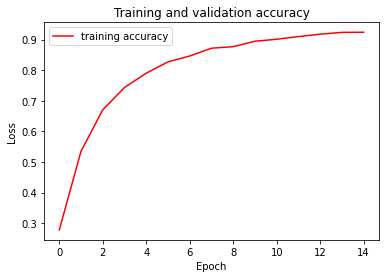

<Figure size 432x288 with 0 Axes>

In [25]:
loss, accuracy = history.history['loss'], history.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'r', label='training accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()
plt.show()

In [26]:
model.evaluate(
    x_test,
    y_test,
    verbose=1
)

105/105 [==============================] - 2s 20ms/step - loss: 0.3350 - accuracy: 0.9163


[0.3350149989128113, 0.916344165802002]

### Save Model

In [27]:
tf.keras.models.save_model(model, filepath="./my_model/OwnCNN_CSV_90p.h5", overwrite=True, save_format='h5')

## Using Images Datasets

### Handle Data

#### Bash Command - Linux

In [ ]:
# Create directories for Image labels
!mkdir -p Test/{1..28}/ Train/{1..28}
# Move Images to assigned directories 
!ls Test\ Images\ 3360x32x32/test/ | rev | cut -f 1 -d '_' | rev | cut -f 1 -d '.' | sort -un | xargs -I{} sh -c 'find -type f | grep "Test" | grep -E "_{}\.png" | xargs -I% mv % Test/{}/'
!ls Train\ Images\ 13440x32x32/train/ | rev | cut -f 1 -d '_' | rev | cut -f 1 -d '.' | sort -un | xargs -I{} sh -c 'find -type f | grep "Train" | grep -E "_{}\.png" | xargs -I% mv % Train/{}/'

#### Python Command - Windows

In [ ]:
# Haven't decided how to do it yet

### CNN Transfer Learning

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
model = ResNet50(
    include_top=False, 
    weights='imagenet', 
    input_shape=(32,32,1)
    )